## Highlighting outliers

An outlier is a data point that is significantly different from the remaining data. On
occasions, outliers are very informative; for example, when looking for credit card
transactions, an outlier may be an indication of fraud. In other cases, outliers are rare
observations that do not add any additional information. These cases may also affect the
performance of some machine learning models.

*An outlier is an observation which deviates so much from the other observations as to
arouse suspicions that it was generated by a different mechanism. [D. Hawkins.
Identification of Outliers, Chapman and Hall, 1980.]*

we will learn how to identify outliers using boxplots and the inter-quartile
range (IQR) proximity rule. According to the IQR proximity rule, a value is an outlier if it
falls outside these boundaries:

      Upper boundary = 75th quantile + (IQR * 1.5)
      Lower boundary = 25th quantile - (IQR * 1.5)
 
Here, IQR is given by the following equation:

      IQR = 75th quantile - 25th quantile

Typically, we calculate the IQR proximity rule boundaries by multiplying
the IQR by 1.5. However, it is also common practice to find extreme
values by multiplying the IQR by 3.

In [1]:
# Import the required Python libraries and the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [4]:
# Load the Boston House Prices dataset from scikit-learn and retain three of its variables in a dataframe:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

In [5]:
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


Text(0.5, 1.0, 'Boxplot')

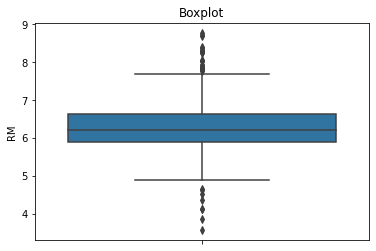

In [6]:
# Make a boxplot for the RM variable:
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

We can change the final size of the plot using the figure() method from
Matplotlib. We need to call this command before making the plot with
seaborn:


Text(0.5, 1.0, 'Boxplot')

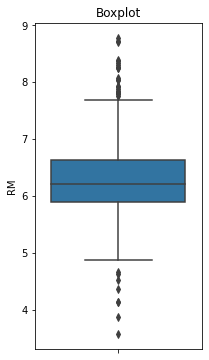

In [7]:
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

To find the outliers in a variable, we need to find the distribution boundaries
according to the IQR proximity rule, which we discussed in the Getting ready
section of this recipe.

In [8]:
# Create a function that takes a dataframe, a variable name, and the factor to use in the IQR calculation and returns the IQR proximity rule boundaries:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [9]:
# Calculate and then display the IQR proximity rule boundaries for the RM variable
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730499999999999, 4.778500000000001)

If you want to find very extreme values, you can use 3 as the distance of
find_boundaries() instead of 1.5 .

In [10]:
# Create a boolean vector to flag observations outside the boundaries we determined 
outliers = np.where(boston['RM'] > upper_boundary, True,np.where(boston['RM'] < lower_boundary, True, False))

In [12]:
# Create a new dataframe with the outlier values and then display the top five rows:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

To remove the outliers from the dataset, execute **`boston.loc[~outliers, 'RM']`**